In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

c:\Users\iamfa\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\iamfa\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\iamfa\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

- Import `TensorFlow` and `Keras` for building and training neural networks.
- Import `Matplotlib` for visualizing data.
- `%matplotlib inline` enables image rendering directly in Jupyter notebooks.
- Import `NumPy` for numerical operations and array handling.

In [7]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

- Load the MNIST handwritten digit dataset, split into training and testing sets.

- `X_train` and `X_test` contain image data
- `y_train` and `y_test` contain corresponding labels.



In [8]:
X_train.shape

(60000, 28, 28)

- The training set has 60,000 grayscale images, each 28x28 pixels.

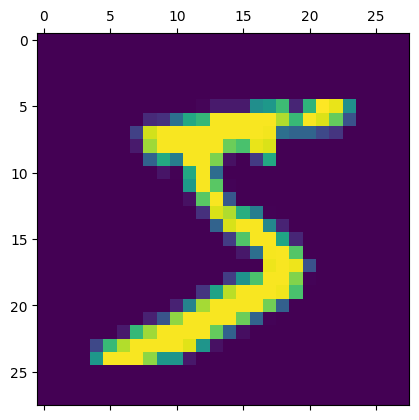

In [9]:
# Display the first training image
# Visualize the first image from the training set as a matrix plot (a handwritten digit).
plt.matshow(X_train[0])


In [10]:
# Show the first 10 labels in the training set, representing the digits in the corresponding images.

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
# Normalize pixel values
# Normalize pixel values from to to improve model training efficiency.
X_train = X_train / 255
X_test = X_test / 255


In [12]:
# Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\iamfa\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Create a sequential model with:
- Flatten layer: converts 28x28 images to 784-element vectors.
- Dense hidden layer with 100 units and ReLU activation.
- Output layer with 10 units and softmax activation for digit classification.
---
- Sequential Model: A Sequential model in Keras is a linear stack of layers where the output of one layer is the input to the next.
- Flatten layer: The Flatten layer transforms the input data's shape without changing its values.
- Dense Layer: Also known as a fully connected layer, it means every input neuron is connected to every neuron in this layer. The dense hidden layer acts as a feature extractor, combining and transforming input data representations for better classification.
- Activation Function - ReLU: The ReLU function (Rectified Linear Unit) is applied to each neuron’s output. It outputs the input directly if positive; otherwise, it outputs zero.
- Output layer: The output layer provides probabilities that the input image belongs to each digit class, allowing the model to predict the most likely digit.
- Softmax Activation: This function converts the raw output scores from the 10 neurons into probabilities that sum to 1.

In [13]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Specify training configuration:
- Optimizer: Adam for adaptive learning.
- Loss: Sparse categorical cross-entropy for multi-class classification.
- Metric: Accuracy to evaluate performance during training.
---
- Optimizer: Adam is an adaptive learning rate optimization algorithm that adjusts the learning rate dynamically during training. Adam helps the model converge faster and often leads to better performance.

- Loss: Sparse Categorical Cross-Entropy loss function is used for multi-class classification problems where the labels are provided as integers. It measures the difference between the true label and the predicted probability distribution over classes.

- Metric: Accuracy is a simple evaluation metric that tracks the proportion of correct predictions during training and evaluation. It helps you monitor how well your model is performing in terms of classifying the images correctly as training progresses.

In [14]:
# Train
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9203 - loss: 0.2806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9633 - loss: 0.1263
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0887
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9798 - loss: 0.0669
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9831 - loss: 0.0542


- Train the model on the training data for 5 epochs (full passes over the dataset).
- An epoch refers to one complete pass through the entire training dataset. When we train a model for 5 epochs, it means the model has seen and learned from the whole training dataset 5 times.
- The output shows accuracy and loss improvements during training.

In [15]:
# Evaluate
model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9748 - loss: 0.0823


[0.08228874206542969, 0.9747999906539917]

- Test the trained model on unseen test data.
- Returns loss and accuracy (97.46% accuracy).

In [16]:
# Predict labels for test set
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step


- Predict probabilities for each digit class on the test images.
- Extract predicted digit labels by taking the class with highest probability.

In [17]:
# Generate confusion matrix to analyze prediction errors
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    3,    2,    0,    1,    2,    1,    2,    3],
       [   0, 1125,    3,    1,    0,    1,    3,    0,    2,    0],
       [   2,    0, 1015,    3,    1,    0,    2,    5,    4,    0],
       [   1,    0,    3,  993,    0,    3,    0,    3,    3,    4],
       [   1,    0,    5,    1,  954,    1,    5,    2,    2,   11],
       [   2,    0,    0,   19,    1,  859,    3,    1,    4,    3],
       [   4,    2,    2,    1,    4,    6,  935,    0,    4,    0],
       [   1,    6,    8,    7,    1,    0,    0,  989,    2,   14],
       [   5,    1,    4,   15,    4,    4,    2,    3,  933,    3],
       [   2,    4,    0,    6,    9,    3,    0,    4,    2,  979]],
      dtype=int32)>

- Compute confusion matrix: compares true labels with predicted labels for all digits.
- Matrix values on the diagonal are correct predictions
- Off-diagonal values reveal confusions.

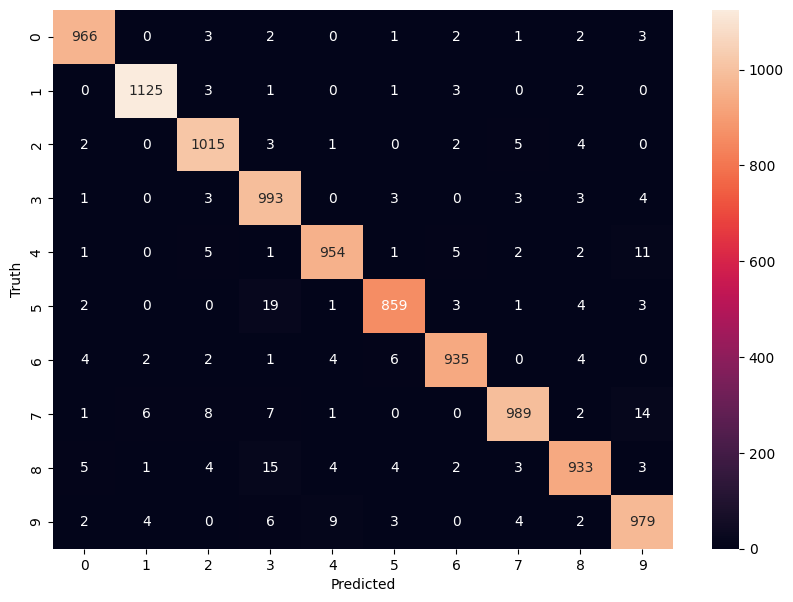

In [18]:
# Plot confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

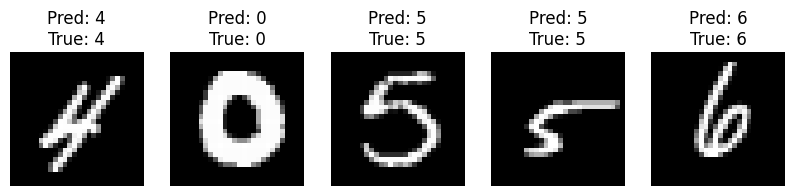

In [23]:
import random

# Show random example predictions
num_examples = 5
random_indices = random.sample(range(len(X_test)), num_examples)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_predicted_labels[idx]}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.show()